# Dense Deep Neural Network: Handwritten Digit Recognition

This notebook uses the classic [MNIST handwritten digit](http://yann.lecun.com/exdb/mnist/) dataset, which contains digit 0-9 images of size 28*28. We build a dense neural network to predict the class of digit.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

## The MNIST dataset

### Get the data
MNIST dataset is provided by Keras directly. The following codes show how to load it. 

In [ ]:
help(mnist.load_data)

Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
    
  

In [ ]:
# the data, shuffled and split between train and test sets 
np.random.seed(0)
tf.random.set_seed(0) 
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Reshape and normalize the features

In [ ]:
input_dim = 784 # 28*28
X_train = X_train_pre.reshape(X_train_pre.shape[0], input_dim) 
X_test = X_test_pre.reshape(X_test_pre.shape[0], input_dim) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255. 
X_test /= 255.

print('training data shape:', X_train.shape)
print('{} train samples, {} test samples'.format(X_train.shape[0], X_test.shape[0]))

training data shape: (60000, 784)
60000 train samples, 10000 test samples


### convert class vectors to binary class matrices
convert class label to one-hot coding

In [ ]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)
# the first 5 samples are 5,0,4,1,9
y_train[:5,] 

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
validation_split = 0.166667
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))

training data shape: (50000, 784)
50000 train samples, 10000 validation samples, 10000 test samples


## The model

### Build the model

In [ ]:
#from keras.layers import Dropout

model = keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(1),
              metrics=['accuracy'])

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [ ]:
EPOCHS = 10

history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val))

Epoch 1/10
391/391 [==============================] - 5s 13ms/step - loss: 0.2924 - accuracy: 0.9117 - val_loss: 0.1584 - val_accuracy: 0.9526
Epoch 2/10
391/391 [==============================] - 6s 15ms/step - loss: 0.1121 - accuracy: 0.9660 - val_loss: 0.0932 - val_accuracy: 0.9717
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 0.0730 - accuracy: 0.9790 - val_loss: 0.0779 - val_accuracy: 0.9763
Epoch 4/10
391/391 [==============================] - 5s 12ms/step - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.0700 - val_accuracy: 0.9788
Epoch 5/10
391/391 [==============================] - 6s 14ms/step - loss: 0.0364 - accuracy: 0.9886 - val_loss: 0.0625 - val_accuracy: 0.9801
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.0272 - accuracy: 0.9920 - val_loss: 0.0656 - val_accuracy: 0.9809
Epoch 7/10
391/391 [==============================] - 7s 17ms/step - loss: 0.0190 - accuracy: 0.9947 - val_loss: 0.0629 - val_accuracy: 0.9816

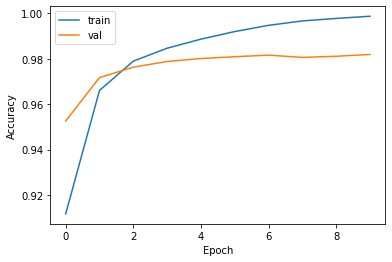

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

### Make predictions

Calculate the classification accuracy for testing set

In [ ]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.17%


Make predictions for testing data

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, 0, 4])

Visualize predictions

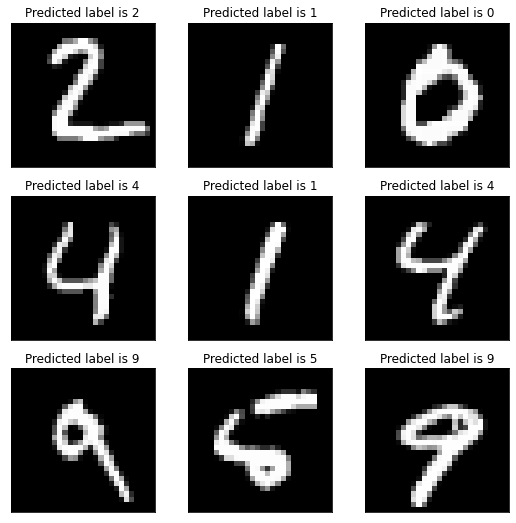

In [ ]:
fig = plt.figure(figsize=(9, 9))
col = 3
row = 3
for i in range(1, col*row +1):
    pred = y_pred[i]
    img = X_test_pre[i,:]
    fig.add_subplot(row, col, i)
    plt.title('Predicted label is {}'.format(pred))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()

## Early Stopping

In [ ]:
EPOCHS = 10

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)


history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

Epoch 1/10
391/391 [==============================] - 6s 15ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0611 - val_accuracy: 0.9844
Epoch 2/10
391/391 [==============================] - 5s 12ms/step - loss: 0.0025 - accuracy: 0.9997 - val_loss: 0.0612 - val_accuracy: 0.9840


In [ ]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.26%
